In [218]:
import pandas as pd

In [223]:
order = pd.read_csv('data/Daily_Demand_Forecasting_Orders.csv', delimiter=';')

In [224]:
order

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [225]:
banking_orders_2 = order['Banking orders (2)']

In [226]:
import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt

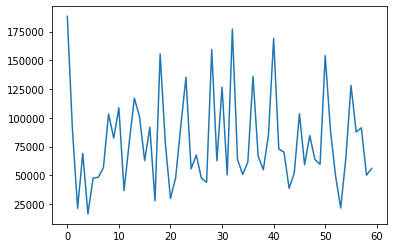

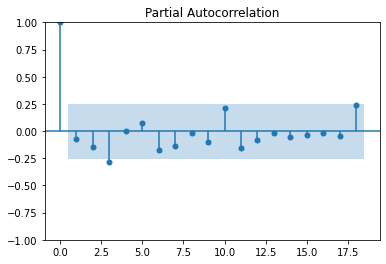

In [227]:
plt.plot(banking_orders_2)
sgt.plot_pacf(banking_orders_2, method="ywm")

plt.show()

In [232]:
from statsmodels.tsa import ar_model

search = ar_model.ar_select_order(endog=banking_orders_2, maxlag=8, ic="aic", glob=True)
search.ar_lags

[1, 2, 3]

In [228]:
mod = sm.tsa.arima.ARIMA(banking_orders_2, order=(3, 0, 0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -717.601
Date:                Thu, 20 Apr 2023   AIC                           1445.202
Time:                        15:56:26   BIC                           1455.674
Sample:                             0   HQIC                          1449.298
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.94e+04   3631.436     21.865      0.000    7.23e+04    8.65e+04
ar.L1         -0.1353      0.181     -0.746      0.456      -0.491       0.220
ar.L2         -0.2016      0.111     -1.810      0.0

In [229]:
mod = sm.tsa.arima.ARIMA(banking_orders_2, order=(3, 0, 0), enforce_stationarity=False)
with mod.fix_params({'ar.L1': 0}):
    res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -679.043
Date:                Thu, 20 Apr 2023   AIC                           1366.087
Time:                        15:58:12   BIC                           1374.259
Sample:                             0   HQIC                          1369.263
                                 - 60                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.94e+04   3680.484     21.574      0.000    7.22e+04    8.66e+04
ar.L1 (fixed)          0        nan        nan        nan         nan         nan
ar.L2            -0.1095      0.120     

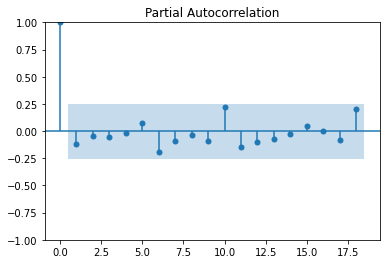

In [230]:
sgt.plot_pacf(res.resid, method="ywm")
plt.show()

In [96]:
sm.stats.acorr_ljungbox(res.resid, lags=[10], model_df=3, return_df=True)

,lb_stat,lb_pvalue
10,8.838425,0.264466


<AxesSubplot:>

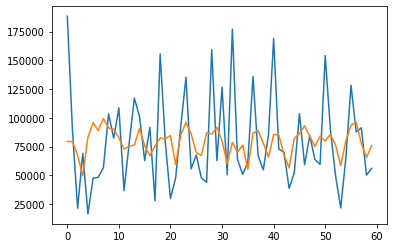

In [231]:
banking_orders_2.plot()
res.fittedvalues.plot()

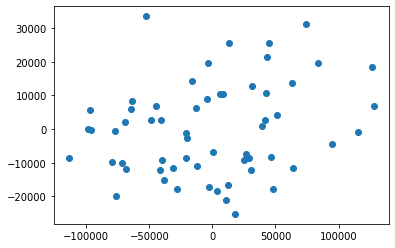

In [124]:
plt.scatter(banking_orders_2.diff(), res.fittedvalues.diff())

# Moving Average Model

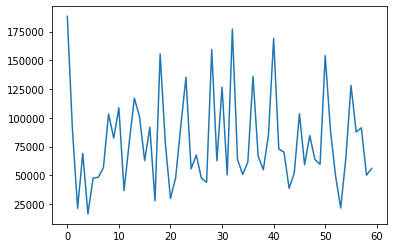

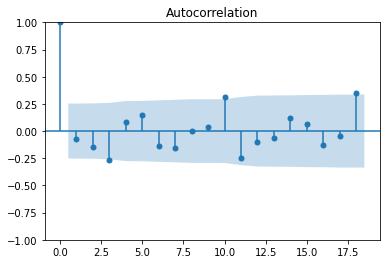

In [130]:
plt.plot(banking_orders_2)
sgt.plot_acf(banking_orders_2, adjusted=True)

plt.show()

In [137]:
mod = sm.tsa.arima.ARIMA(banking_orders_2, order=(0, 0, 9), enforce_invertibility=False)
with mod.fix_params({'ma.L1': 0, 'ma.L2': 0, 'ma.L4': 0, 'ma.L5': 0, 'ma.L6': 0, 'ma.L7': 0, 'ma.L8': 0}):
    res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(0, 0, 9)   Log Likelihood                -720.150
Date:                Thu, 20 Apr 2023   AIC                           1448.300
Time:                        04:43:29   BIC                           1456.677
Sample:                             0   HQIC                          1451.577
                                 - 60                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.94e+04   2085.761     38.068      0.000    7.53e+04    8.35e+04
ma.L1 (fixed)          0        nan        nan        nan         nan         nan
ma.L2 (fixed)          0        nan     

In [138]:
sm.stats.acorr_ljungbox(res.resid, lags=[10], model_df=3, return_df=True)

,lb_stat,lb_pvalue
10,7.470344,0.381601


In [139]:
res.fittedvalues

0      79401.483339
1      79401.483339
2      79401.483339
3      36669.653446
4      75458.143639
5     102175.357763
6      64856.347511
7     106687.251005
8     104409.842296
9      86527.248507
10    103175.921464
11     80290.624312
12     81100.624566
13     77247.012761
14    100911.682367
15     80979.260452
16     60583.353189
17     79342.706377
18     88233.085675
19     64259.799513
20    104701.842832
21     46832.035757
22     72199.326275
23    115597.903043
24     79106.596936
25     69191.735554
26     70344.384297
27     90151.273348
28     80031.329959
29     91122.143737
30    101753.417748
31     40825.917387
32     92951.739250
33     67585.624950
34     74768.489903
35     38842.786323
36     81713.875406
37     90273.110119
38     68660.793439
39     52889.397999
40     90694.106735
41     85332.707942
42     63720.468855
43     41700.476495
44     85232.520986
45     75763.322520
46     81099.141998
47     95554.389105
48     65646.874167
49     89247.963824


In [200]:
# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples (ar,ma,nobs):
    arma_model   = ArmaProcess(ar=ar, ma=ma)        # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples


In [201]:
test = gen_arma_samples(ar = [2], ma = [1], nobs = 1000)

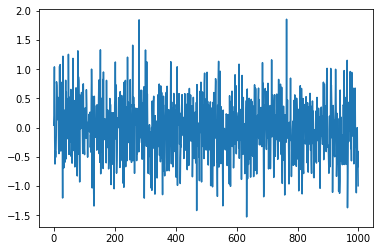

In [202]:
plt.plot(test)

In [203]:
mod = sm.tsa.arima.ARIMA(test, order=(1, 0, 1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -722.260
Date:                Thu, 20 Apr 2023   AIC                           1452.520
Time:                        05:05:37   BIC                           1472.151
Sample:                             0   HQIC                          1459.981
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0173      0.014     -1.236      0.216      -0.045       0.010
ar.L1          0.6646      0.317      2.096      0.036       0.043       1.286
ma.L1         -0.7027      0.303     -2.323      0.0

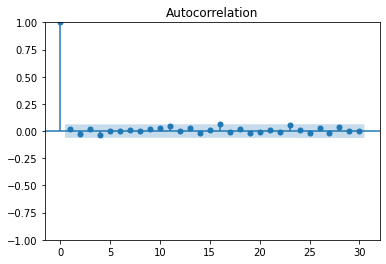

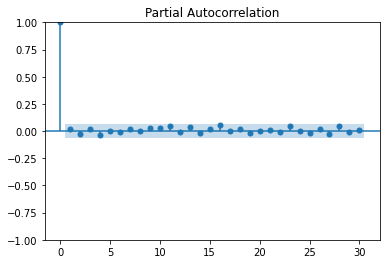

In [204]:
sgt.plot_acf(res.resid, adjusted=True)
sgt.plot_pacf(res.resid, method="ywm")
plt.show()

In [205]:
mod = sm.tsa.arima.ARIMA(test, order=(2, 0, 1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -721.675
Date:                Thu, 20 Apr 2023   AIC                           1453.349
Time:                        05:05:38   BIC                           1477.888
Sample:                             0   HQIC                          1462.676
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0174      0.015     -1.144      0.253      -0.047       0.012
ar.L1         -0.7873      0.227     -3.463      0.001      -1.233      -0.342
ar.L2         -0.0507      0.034     -1.473      0.1

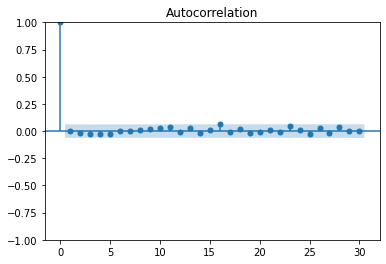

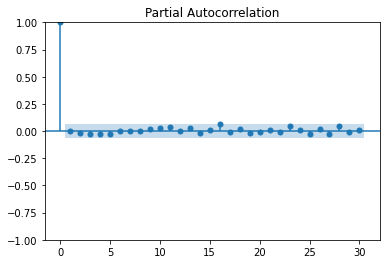

In [206]:
sgt.plot_acf(res.resid, adjusted=True)
sgt.plot_pacf(res.resid, method="ywm")
plt.show()

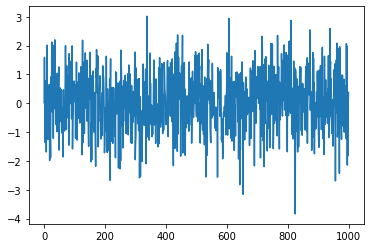

In [217]:
plt.plot(gen_arma_samples(ar = [10], ma = [10], nobs = 1000))